## The main objective of this notebook is to explore the private income statement file 

In [1]:
import pandas as pd
import zipfile
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
pwd()

'/home/andras_szabo/Plinth/git_repo/notebooks'

In [3]:
import re
def getIndicatorsValues(df,row_index):
    
    row = (df.iloc[row_index]).iloc[2:]
    list_values = [str(row.iloc[i]) for i in range(len(row)) if i%2==1]
    for i in range(len(list_values)):
        if re.findall("[a-zA-Z]",list_values[i]):
            list_values[i] = np.NaN
            
        else:
            list_values[i] = float(list_values[i])
    return pd.Series(list_values)

def getListOfDates(df):
    '''
    Get all the dates in a file in Date format
    inputs: A datframe containing the data of a file and a index of a row 
    output: The list of all the dates in the file
    Exception: The row index doesn"t exist or the dataframe doesn't exist
    '''
    row_index = 0
    while(str(df.iloc[row_index,2]) == 'NaT'):
        row_index += 1
    row = (df.iloc[row_index]).iloc[2:]
    return pd.Series([row.iloc[i] for i in range(len(row)) if i%2 == 0 and i!=0])

def get_file_identifier(df):
    '''
    return the identifier of a file
    input: dataframe
    output:String representing the identifier of a file
    '''
    try:
        return df.iloc[0,0]
    except Exception as ex:
        print(ex)
def getIndicatorName(df, row_index):
    return (df.iloc[row_index]).iloc[1]


def dropColumnsWithNoNaPercentage(df,percentage):
    """
    Keep columns with at least threshold percentage of non NaN Data
    Input: The dataframe  and the percentage
    No output: The new Dataframe
    """
    
    numberna = int(percentage*df.shape[0]/100)
    
    df.dropna(thresh = numberna,axis = 1, inplace = True )
    return df

def dropRowsWithNoNaPercentage(df,percentage):
    """
    Keep rows with at least threshold percentage of non NaN Data
    Input: The dataframe  and the percentage
    No output: The new Dataframe
    """
    
    numberna = int(percentage*df.shape[1]/100)
    
    df.dropna(thresh = numberna,axis = 0, inplace = True )
    return df

In [4]:
#Create a dictionnary with Date and Indicators values
def getDataDict(df):
    datadict = {}
    datadict["CompanyId"] = get_file_identifier(df)
    #A problem to solve: get the right cells for date
    datadict["Dates"]= getListOfDates(df)
    for i in range(df.shape[0]):
        datadict[getIndicatorName(df,i)]= getIndicatorsValues(df,i)
        
    return datadict


In [5]:

#NotebookApp.iopub_data_rate_limit=10000000.0 (bytes/sec)
#NotebookApp.rate_limit_window=3.0 (secs)

# Take a  file, get a new dataframe with indicators in columns and dates as index
def dfToDf(df):
    
    df_dict = getDataDict(df)
    df_new = pd.DataFrame(df_dict)
    #df_new.dropna(axis = 0, how = 'all', inplace = True)
    return df_new


In [6]:
#A function take a  zip of csv files and transform it to a Dataframe with all csv files data
def transform(zipFile, delimiter):
    """
    input: the zip file and a  delimiter for the csv files
    
    output: A dataframe containing all the data for the zip file
    
    """
    zf = zipfile.ZipFile(zipFile)
    
    textfiles = zf.infolist()
    
    list_ = []
    list_empty_file = []
    
    for textfile in textfiles:
        csv_file = zf.open(textfile.filename)
        
        first_line =  str(csv_file.readline())
        
        num_cols = first_line.count(delimiter)
        # In order to avoid files with no data
        if num_cols > 4:
            df = pd.read_csv(csv_file, header = None, parse_dates = [i for i in range(num_cols) if  i%2 == 0 and i!=0])
        
            
            dfnew  = dfToDf(df)
        
            list_.append(dfnew)
        else: list_empty_file.append( csv_file.name)
    
    frame = pd.concat(list_, axis = 0)
    
   
    
    return frame, list_empty_file
    

In [7]:
dfs_software_private_income,_ = transform('../../software_private_annual_income_statements.zip', ',')


In [8]:
dfs_software_private_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2797 entries, 0 to 10
Data columns (total 78 columns):
CompanyId                             2797 non-null object
Dates                                 2423 non-null datetime64[ns]
IQ_OTHER_UNUSUAL_SUPPL                73 non-null float64
IQ_NI_COMPANY                         216 non-null float64
IQ_RESTRUCTURE                        35 non-null float64
IQ_COST_REV                           190 non-null float64
IQ_OTHER_OPER                         2380 non-null float64
IQ_RD_EXP_FN                          84 non-null float64
IQ_DILUT_EPS_EXCL                     177 non-null float64
IQ_EBITDA_EXCL_SBC                    204 non-null float64
IQ_NI_NORM                            215 non-null float64
IQ_NI                                 2788 non-null float64
IQ_TOTAL_REV                          2796 non-null float64
IQ_EBIT_EQ_INC_EXCL_SBC               206 non-null float64
IQ_TOTAL_OTHER_OPER                   2786 non-null float64
I

In [9]:
dfs_software_private_income

,CompanyId,Dates,IQ_OTHER_UNUSUAL_SUPPL,IQ_NI_COMPANY,IQ_RESTRUCTURE,IQ_COST_REV,IQ_OTHER_OPER,IQ_RD_EXP_FN,IQ_DILUT_EPS_EXCL,IQ_EBITDA_EXCL_SBC,...,IQ_TOTAL_UNUSUAL_SUPPLE,IQ_PERIODLENGTH_IS,IQ_EBT,IQ_EBITA,IQ_OTHER_NON_OPER_EXP_SUPPL,IQ_EBITA_EXCL_SBC,IQ_DILUT_EPS_NORM,IQ_RESTATEMENT_IS,IQ_TOTAL_REV_SHARE,IQ_EBITA_EQ_INC_EXCL_SBC
0,IQ145536370,2007-12-01,NaN,NaN,NaN,NaN,2.253000,NaN,NaN,NaN,...,NaN,NaN,-0.261000,NaN,0.001000,NaN,NaN,NaN,NaN,NaN
1,IQ145536370,2008-12-01,NaN,NaN,NaN,NaN,2.126000,NaN,NaN,NaN,...,NaN,NaN,1.007000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IQ145536370,2009-12-01,NaN,NaN,NaN,NaN,4.054000,NaN,NaN,NaN,...,NaN,NaN,1.167000,NaN,-0.001000,NaN,NaN,NaN,NaN,NaN
3,IQ145536370,2010-12-01,NaN,NaN,NaN,NaN,5.630000,NaN,NaN,NaN,...,NaN,NaN,0.521000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IQ145536370,2011-12-01,NaN,NaN,NaN,NaN,9.088000,NaN,NaN,NaN,...,NaN,NaN,2.499000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IQ145536370,2012-12-01,NaN,NaN,NaN,NaN,13.529000,NaN,NaN,NaN,...,NaN,NaN,-6.781000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IQ145536370,2013-12-01,NaN,NaN,NaN,NaN,21.610000,NaN,NaN,NaN,...,NaN,NaN,-12.264000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,IQ145536370,2014-12-01,NaN,NaN,NaN,NaN,21.880000,NaN,NaN,NaN,...,NaN,NaN,-11.411000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IQ145536370,2015-12-01,NaN,NaN,NaN,NaN,25.252000,NaN,NaN,NaN,...,NaN,NaN,-11.803000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,IQ145536370,2016-12-01,NaN,NaN,NaN,NaN,38.485000,NaN,NaN,NaN,...,NaN,NaN,-16.554000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Keep the columns with at least 80% of Not Null Data
dfs_software_private_income = dropColumnsWithNoNaPercentage(dfs_software_private_income,80)

In [11]:
dfs_software_private_income.shape

(2797, 16)

In [12]:
#Keep the rows with at least 90% of Not Null Data
dfs_software_private_income = dropRowsWithNoNaPercentage(dfs_software_private_income,90)

In [13]:
dfs_software_private_income.shape

(2488, 16)

In [14]:
# print(dfs_software_public_income.columns)
#  This does not exist!

In [15]:
print(dfs_software_private_income.shape)

(2488, 16)


In [16]:
#The percentage of NaN for EBITDA column
(np.sum(dfs_software_private_income.IQ_EBITDA.isnull())/2488)*100

11.655948553054662

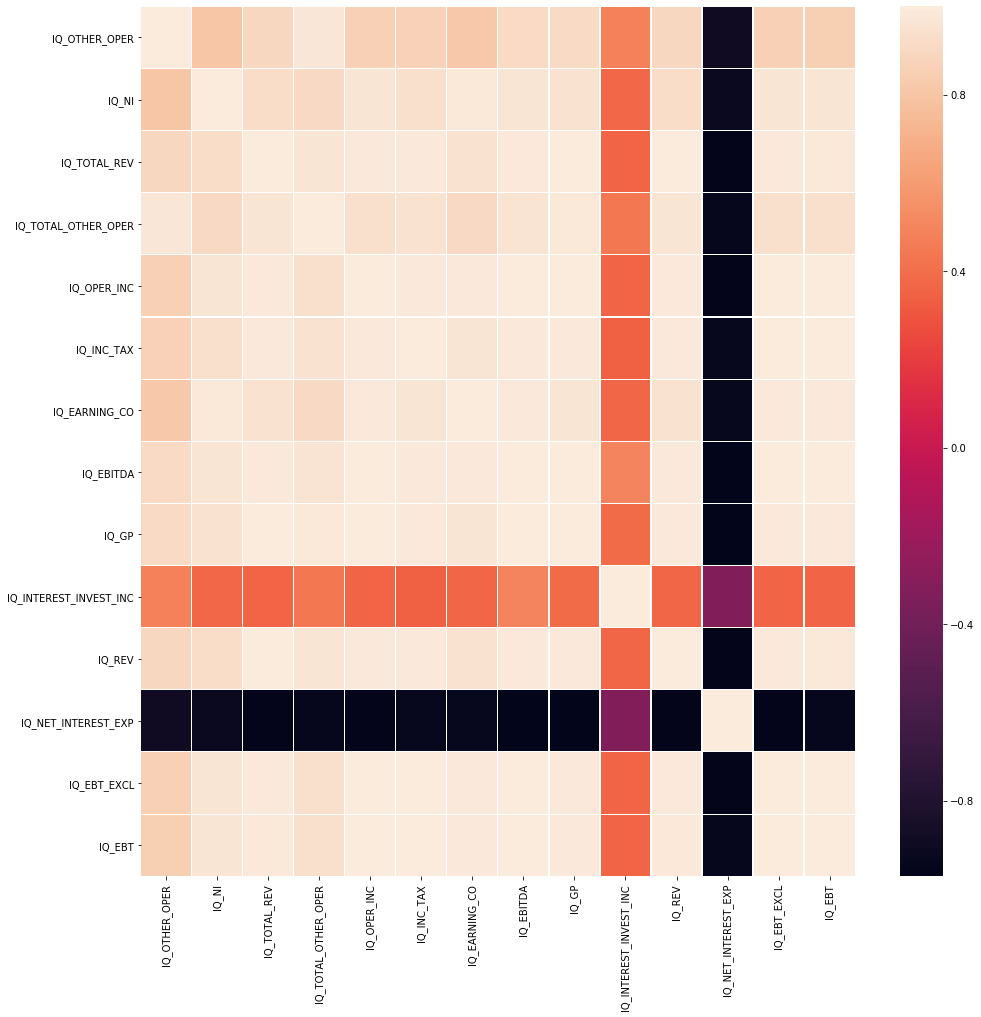

In [17]:
#Correlations
plt.figure(figsize=(16,16))
sns.heatmap(dfs_software_private_income.corr()  ,linewidths=0.1)

In [18]:

def getListCorrelated(df,threshold):
    """
    Create a dictionnary of the features greater than the threshold and lesser than the minus threshold
    input: A dictionnary and the threshold ( positive or negative)
    output: A dictionnary with features as key, list of feature to which it's correlated depending on threshold, and the number of features
       to which it is correlated
    
    """
    A =  (df.corr())
    theDict = {}
    for idx in A.index:
        theDict[idx]=[[],0]
    for idx in A.index:
        for idx1 in A.index:
            if A.loc[idx,idx1] >= threshold or A.loc[idx,idx1] <= -threshold:
                theDict[idx][0].append( (A.loc[idx1]).name)
        theDict[idx][1] = len(theDict[idx][0])
    return theDict
getListCorrelated(dfs_software_private_income,0.9)    

{'IQ_OTHER_OPER': [['IQ_OTHER_OPER',
   'IQ_TOTAL_OTHER_OPER',
   'IQ_EBITDA',
   'IQ_GP'],
  4],
 'IQ_NI': [['IQ_NI',
   'IQ_TOTAL_REV',
   'IQ_TOTAL_OTHER_OPER',
   'IQ_OPER_INC',
   'IQ_INC_TAX',
   'IQ_EARNING_CO',
   'IQ_EBITDA',
   'IQ_GP',
   'IQ_REV',
   'IQ_NET_INTEREST_EXP',
   'IQ_EBT_EXCL',
   'IQ_EBT'],
  12],
 'IQ_TOTAL_REV': [['IQ_NI',
   'IQ_TOTAL_REV',
   'IQ_TOTAL_OTHER_OPER',
   'IQ_OPER_INC',
   'IQ_INC_TAX',
   'IQ_EARNING_CO',
   'IQ_EBITDA',
   'IQ_GP',
   'IQ_REV',
   'IQ_NET_INTEREST_EXP',
   'IQ_EBT_EXCL',
   'IQ_EBT'],
  12],
 'IQ_TOTAL_OTHER_OPER': [['IQ_OTHER_OPER',
   'IQ_NI',
   'IQ_TOTAL_REV',
   'IQ_TOTAL_OTHER_OPER',
   'IQ_OPER_INC',
   'IQ_INC_TAX',
   'IQ_EARNING_CO',
   'IQ_EBITDA',
   'IQ_GP',
   'IQ_REV',
   'IQ_NET_INTEREST_EXP',
   'IQ_EBT_EXCL',
   'IQ_EBT'],
  13],
 'IQ_OPER_INC': [['IQ_NI',
   'IQ_TOTAL_REV',
   'IQ_TOTAL_OTHER_OPER',
   'IQ_OPER_INC',
   'IQ_INC_TAX',
   'IQ_EARNING_CO',
   'IQ_EBITDA',
   'IQ_GP',
   'IQ_REV',
   'IQ_NET_I

In [19]:
#Drop all rows where IQ_EBIDTA or IQ_OPER_INC or IQ_TOTAL_OTHER_OPER is NaN
df  = dfs_software_private_income[['Dates','CompanyId','IQ_TOTAL_OTHER_OPER','IQ_OPER_INC','IQ_EBITDA']].dropna( axis = 0)

In [20]:
#df can be used for linear regression
df

,Dates,CompanyId,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_EBITDA
0,2007-12-01,IQ145536370,3.325000,-0.263000,-0.241000
1,2008-12-01,IQ145536370,5.162000,1.002000,1.022000
2,2009-12-01,IQ145536370,9.641000,1.312000,1.533000
3,2010-12-01,IQ145536370,15.859000,0.546000,0.815000
4,2011-12-01,IQ145536370,24.121000,2.531000,4.071000
5,2012-12-01,IQ145536370,34.543000,-6.742000,-5.278000
6,2013-12-01,IQ145536370,48.273000,-12.385000,-10.008000
7,2014-12-01,IQ145536370,53.589000,-10.926000,-7.117000
8,2015-12-01,IQ145536370,53.755000,-11.157000,-5.047000
9,2016-12-01,IQ145536370,59.918000,-16.050000,-10.846000


In [21]:
#Take dates as index 

df.set_index("Dates",inplace=True)

In [22]:
def drop_duplicate_lines(df,list_columns):
    """
    Drop lines with same dates and same companies
    Input: Dataframe and list of columns
    Output: New dataframe with one line for each date and company
    """
    list_df = []
    for name, group in df.groupby(list_columns):
        #get the last value
        list_df.append(group.tail(1))
    return pd.concat(list_df)
#Drop duplicate lines for Dates and CompnyId in df
df = drop_duplicate_lines(df,['Dates','CompanyId'])

In [23]:
df

,CompanyId,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_EBITDA
Dates,,,,
1998-03-01,IQ4484339,3.967870,23.573021,26.654184
1998-03-25,IQ8080920,38.342000,18.677000,22.925000
2000-02-29,IQ128568,34.173000,10.320000,17.942000
2000-02-29,IQ4484339,4.741048,23.508891,24.561145
2000-03-14,IQ8080920,88.343000,11.282000,19.731000
2000-08-29,IQ138652,1.828711,-0.992486,-0.876883
2001-02-15,IQ8080920,175.461000,-91.274000,-82.282000
2001-03-01,IQ716329,14474.000000,25823.000000,31474.000000
2001-05-21,IQ128568,41.277000,47.586000,60.796000


In [24]:
#Scaling the dataframe df with the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = df.groupby('CompanyId')[['IQ_TOTAL_OTHER_OPER','IQ_OPER_INC','IQ_EBITDA']]

list = []
for name, group in df_scale:
    
    scaler.fit(group.loc[:,'IQ_TOTAL_OTHER_OPER':])
    scaler.transform(group.loc[:,'IQ_TOTAL_OTHER_OPER':])
    list.append(group)
df_scale = pd.concat(list)

In [25]:
print('The maximum variance in the scaled data:\n',df_scale.groupby('CompanyId').std().max(), '\n\n')
print('The maximum and minimum mean in the scaled data:\n',
      df_scale.groupby('CompanyId').mean().max(), '\n',
      df_scale.groupby('CompanyId').mean().min(), '\n\n')
print('The maximum and minimum values in the scaled data:\n',
      df_scale.groupby('CompanyId').max().max(), '\n',
      df_scale.groupby('CompanyId').min().min())

The maximum variance in the scaled data:
 IQ_TOTAL_OTHER_OPER     8319.340619
IQ_OPER_INC            14809.695639
IQ_EBITDA              18064.072002
dtype: float64 


The maximum and minimum mean in the scaled data:
 IQ_TOTAL_OTHER_OPER    4536.852402
IQ_OPER_INC            8103.971550
IQ_EBITDA              9880.872259
dtype: float64 
 IQ_TOTAL_OTHER_OPER    -60.459463
IQ_OPER_INC           -334.840857
IQ_EBITDA             -232.710857
dtype: float64 


The maximum and minimum values in the scaled data:
 IQ_TOTAL_OTHER_OPER    21893.0
IQ_OPER_INC            37938.0
IQ_EBITDA              46665.0
dtype: float64 
 IQ_TOTAL_OTHER_OPER    -182.309897
IQ_OPER_INC           -1308.853000
IQ_EBITDA             -1127.585000
dtype: float64


In [26]:
df  = dfs_software_private_income[['Dates','CompanyId','IQ_TOTAL_OTHER_OPER','IQ_OPER_INC','IQ_EBITDA']].\
    dropna( axis = 0)
df.set_index("Dates",inplace=True)
df = drop_duplicate_lines(df,['Dates','CompanyId'])

# Scaling the dataframe df with the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = df.groupby('CompanyId')[['IQ_TOTAL_OTHER_OPER','IQ_OPER_INC','IQ_EBITDA']]

mylist = []
for name, group in df_scale:
    
    scaler.fit(group.loc[:,'IQ_TOTAL_OTHER_OPER':])
    transformed_group_nparray = scaler.transform(group.loc[:,'IQ_TOTAL_OTHER_OPER':])
    transformed_group = pd.DataFrame(transformed_group_nparray,
                                     columns=['IQ_TOTAL_OTHER_OPER','IQ_OPER_INC','IQ_EBITDA'])
    transformed_group['CompanyId'] = name
    mylist.append(transformed_group)
df_scale = pd.concat(mylist)

In [27]:
print('The maximum variance in the scaled data:\n',df_scale.groupby('CompanyId').std().max(), '\n\n')
print('The maximum and minimum mean in the scaled data:\n',
      df_scale.groupby('CompanyId').mean().max(), '\n',
      df_scale.groupby('CompanyId').mean().min(), '\n\n')
print('The maximum and minimum values in the scaled data:\n',
      df_scale.groupby('CompanyId').max().max(), '\n',
      df_scale.groupby('CompanyId').min().min())

The maximum variance in the scaled data:
 IQ_TOTAL_OTHER_OPER    1.414214
IQ_OPER_INC            1.414214
IQ_EBITDA              1.414214
dtype: float64 


The maximum and minimum mean in the scaled data:
 IQ_TOTAL_OTHER_OPER    3.848773e-15
IQ_OPER_INC            5.921189e-16
IQ_EBITDA              7.513831e-16
dtype: float64 
 IQ_TOTAL_OTHER_OPER   -1.427430e-15
IQ_OPER_INC           -5.921189e-16
IQ_EBITDA             -5.551115e-16
dtype: float64 


The maximum and minimum values in the scaled data:
 IQ_TOTAL_OTHER_OPER    3.030676
IQ_OPER_INC            3.173280
IQ_EBITDA              3.167986
dtype: float64 
 IQ_TOTAL_OTHER_OPER   -2.827957
IQ_OPER_INC           -3.446235
IQ_EBITDA             -3.288739
dtype: float64
